In [1]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot

from IPython import display

import imp
del xr.DataArray.climaviz
imp.reload(climatools.plot.plot)

<module 'climatools.plot.plot' from '/nuwa_cluster/home/jackyu/climatools/climatools/plot/plot.py'>

In [2]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'tmp')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')



In [3]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'tmp')


# the set calculated using `absmean`
path_xfluxg = os.path.join(dir_run, 'output_xfluxg.dat')
path_xcoolrg = os.path.join(dir_run, 'output_xcoolrg.dat')
path_xflux = os.path.join(dir_run, 'output_xflux.dat')
path_xcoolr = os.path.join(dir_run, 'output_xcoolr.dat')

In [4]:
# load CRD's fluxes and cooling rates

# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [5]:
# load CRD's fluxes and cooling rates
# the set calculated using `absmean`

# load xfluxg
df = pd.read_csv(path_xfluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_xfluxg = ds

# load xcoolrg
df = pd.read_csv(path_xcoolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_xcoolrg = ds

# load xflux
df = pd.read_csv(path_xflux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_xflux = ds.set_coords(['level'])

# load xcoolr
df = pd.read_csv(path_xcoolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_xcoolr = ds.set_coords(['layer'])

In [6]:
# load mean absorption coefficient and k-distribution functions
# calculated by CRD

# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [13]:
###
names_var = ['flug', 'fnetg', 'coolrg']
colors = ['darkred', 'lightcoral', 'blue']
dict_color = dict(zip(names_var, colors))

###
names_model = ['crd', 'clirad', 'crdx']
linestyles = ['-', '--', '-.']
dict_linestyle = dict(zip(names_model, linestyles))

### 
yscales = ['linear', 'log']
varlims_from_indexrange = [(50, 1050), (1e-4, 50)]
dict_varlim = dict(zip(yscales, varlims_from_indexrange))

###
vartypes = ['flux', 'cooling rate']
names_allowedvar = [['flug', 'fnetg'], ['coolrg']]
dims_vertical = ['level', 'layer']
iverticals = [[0, 75], [0, 74]]
dict_names_allowedvar = dict(zip(vartypes, names_allowedvar))
dict_dims_vertical = dict(zip(vartypes, dims_vertical))
dict_iverticals = dict(zip(vartypes, iverticals))


### 
sum_over_gs = [False, True]


### what data have we?
vartypes = ['flux', 'cooling rate']
names_model = ['crd', 'crdx']
dss_flux = [ds_fluxg, ds_xfluxg]
dss_cool = [ds_coolrg, ds_xcoolrg]
names_ds = list(itertools.product(vartypes, names_model))
dss = list(ds 
           for ds in itertools.chain(dss_flux, dss_cool)
           if ds)
dict_ds = dict(zip(names_ds, dss))


### what to plot in each axis
names_ax = list(itertools.product(vartypes, yscales))




-----  g-group 1  ---------------


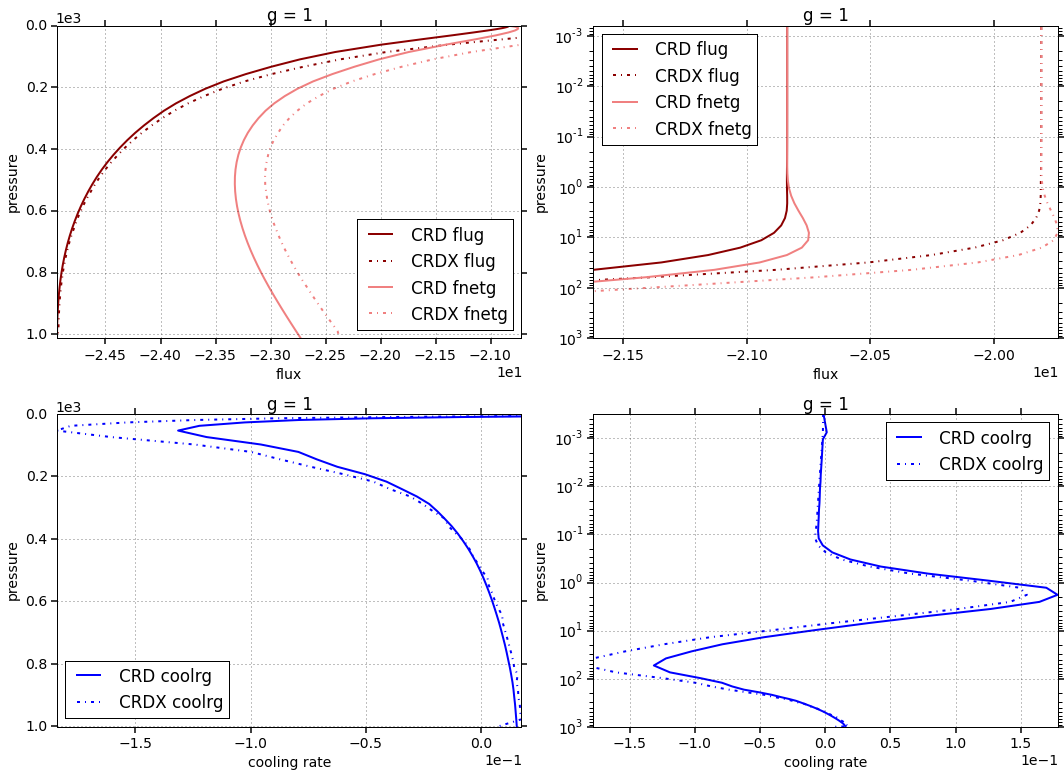


-----  g-group 2  ---------------


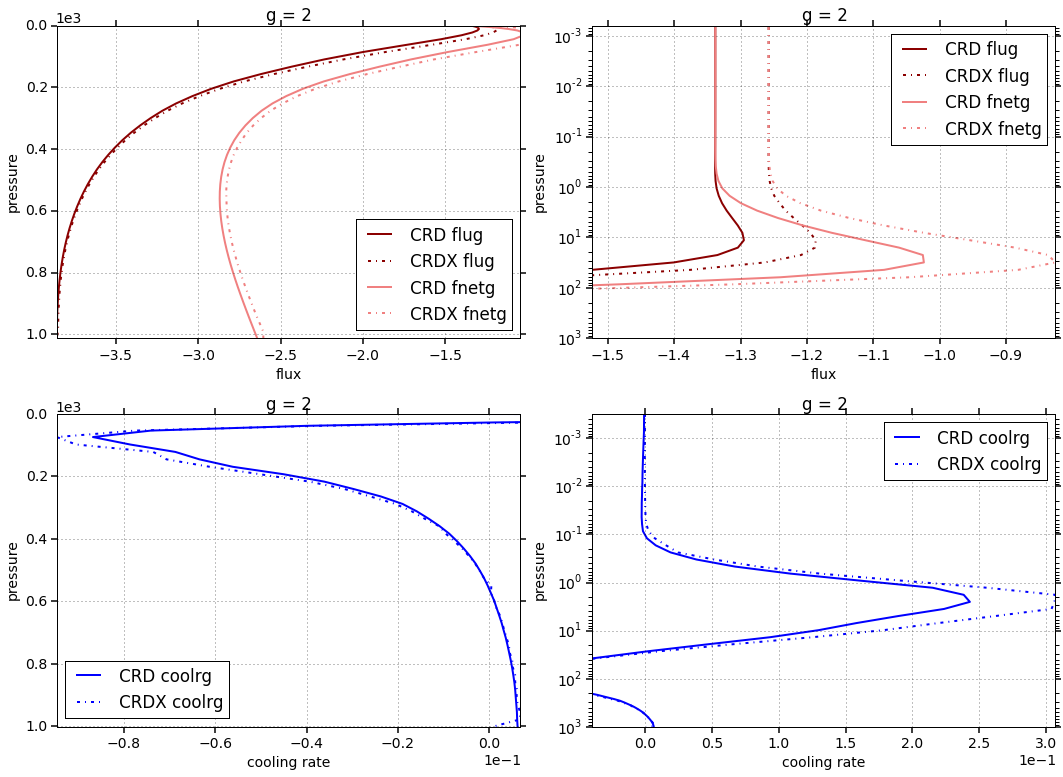


-----  g-group 3  ---------------


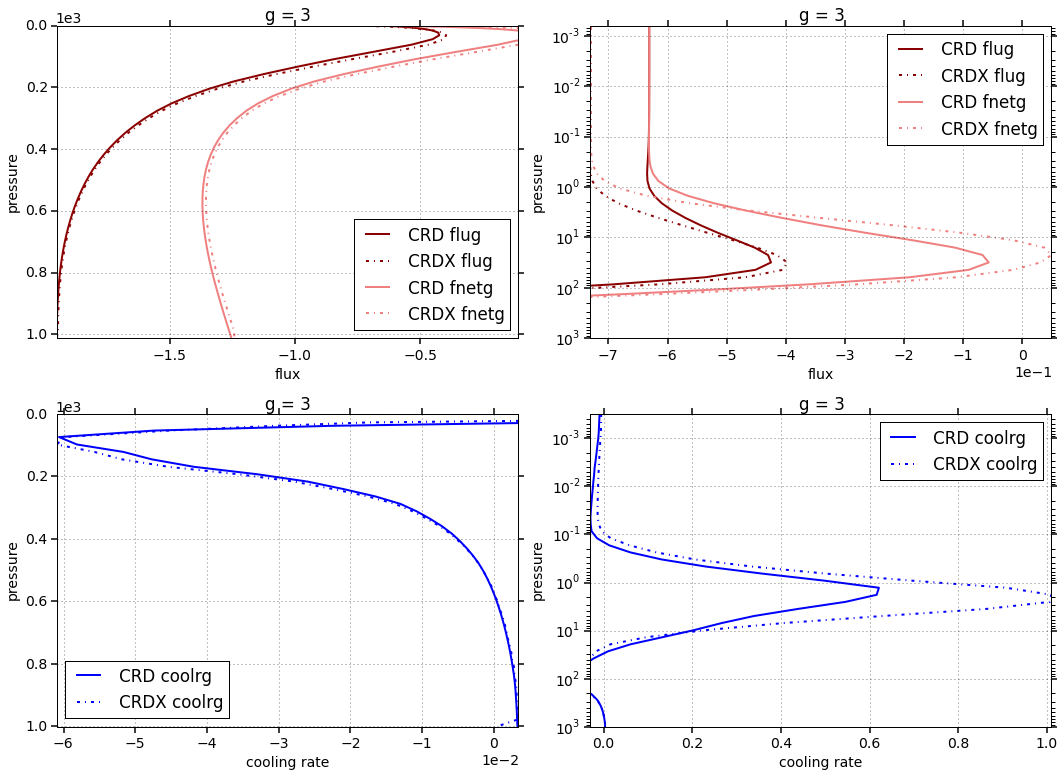


-----  g-group 4  ---------------


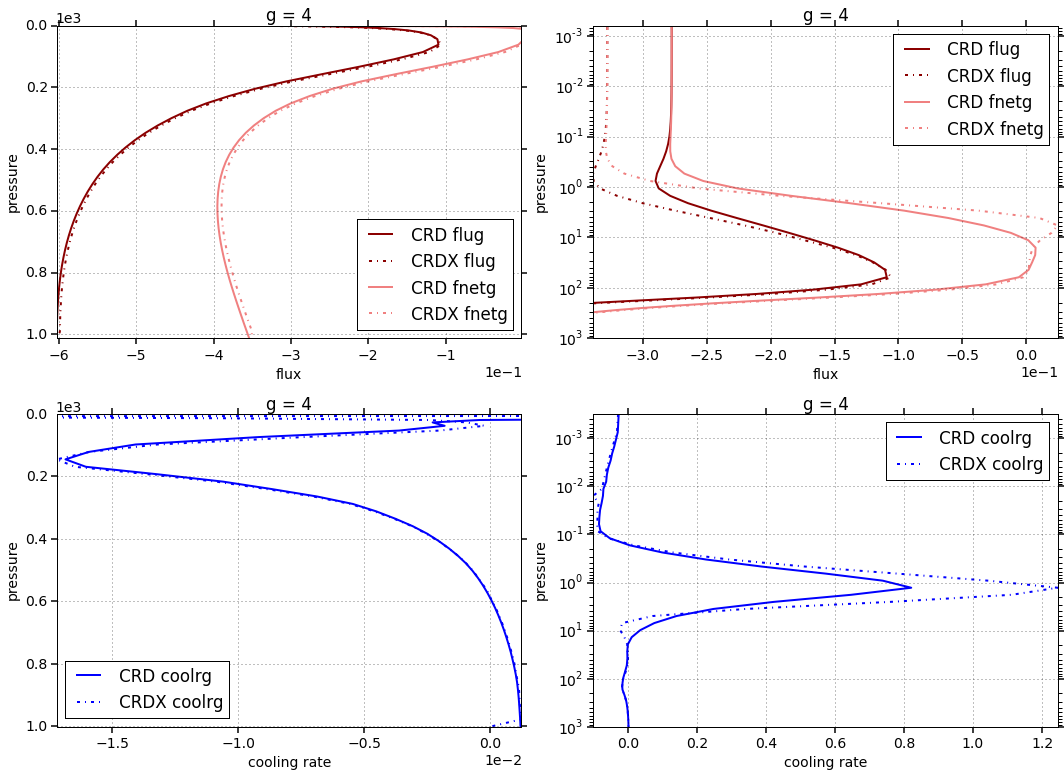

In [8]:
matplotlib.rcParams.update({'font.size': 14})

for g in [1, 2, 3, 4]:
    
    print()
    print(5 * '-' + '  g-group {}  '.format(g) + 15 * '-')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
    axs = axs.flatten()

    for ax, (vartype, yscale) in zip(axs, names_ax):
        for name_var in dict_names_allowedvar[vartype]:
            for model in names_model:
                #print(ax, vartype, yscale, name_var, model)
                ds = dict_ds[(vartype, model)]
                ds[name_var].sel(g=g)\
                .climaviz\
                .plot(ax=ax, 
                      linewidth=2, grid=True,
                      label=model.upper() + ' ' + name_var,
                      color=dict_color[name_var],
                      linestyle=dict_linestyle[model],
                      index_on_yaxis=True, 
                      yincrease=False, yscale=yscale,
                      varlim_from_indexrange=dict_varlim[yscale])
            
                ax.set_xlabel(vartype)
                
                ax.yaxis.set_tick_params(which='major',
                                         direction='out',
                                         size=6, width=1.5)
                ax.yaxis.set_tick_params(which='minor',
                                         direction='out',
                                         size=4, width=1.)
                
                ax.xaxis.set_tick_params(which='major',
                                         direction='out',
                                         size=6, width=1.5)
                ax.xaxis.set_tick_params(which='minor',
                                         direction='out',
                                         size=4, width=1.)
            
    plt.tight_layout()
    display.display(plt.gcf())
    plt.close()

In [14]:
def get_pres_benchmark(vartype='flux', model_benchmark='crd',
                            ipressures=[0, 75]):
    return dict_ds[(vartype, model_benchmark)]\
           .coords['pressure']\
           .isel(pressure=ipressures)
        
        
        
def summarytable(vartype='flux', model='crd', sum_over_g=False,
                 pressures=None):
    if list(pressures) == None:
        ds = dict_ds[(vartype, model)]
    else:
        ds = dict_ds[(vartype, model)]\
             .sel(pressure=pressures, method='nearest')
    
    if sum_over_g:
        ds = ds.sum('g')
    
    df = ds.to_dataframe()
    df = df.set_index([dict_dims_vertical[vartype]], append=True)
    return df




def print_diff_benchmark(dict_df, 
                         benchmark='crd', 
                         title='Untitled'):
        
    print(title)
    
    othercases = [case for case in dict_df.keys()]
    othercases.remove(benchmark)   
    
    df_bench = dict_df[benchmark]
    
    print(benchmark.upper())
    display.display(df_bench)
    
    for case in othercases:
        print(case.upper())
        display.display(dict_df[case])

    for case in othercases:
        df_case = dict_df[case]
        if not all(df_case.index == df_bench.index):
            print('Case indices not identical to benchmark indices. '
                  "Force case indices to be the same as benchmark's")
            df_case.index = df_bench.index
        
        print('{} - {}'.format(case.upper(), benchmark.upper()))
        display.display(df_case - df_bench)
        
            

In [15]:
benchmark = 'crd'

for sum_over_g in sum_over_gs:
    print(2*'\n')
    for vartype in vartypes:
        print(2*'\n')
        pres_benchmark = get_pres_benchmark(vartype=vartype,
                                            model_benchmark=benchmark,
                                            ipressures=dict_iverticals[vartype])
        dict_tables = {model: summarytable(vartype=vartype,
                                           model=model,
                                           sum_over_g=sum_over_g,
                                           pressures=pres_benchmark)
                       for model in names_model}
        print_diff_benchmark(dict_tables, 
                             benchmark='crd',
                             title='{}. {}'\
                             .format(vartype.upper(),
                                     'total over g' if sum_over_g
                                     else 'separate gs'))







FLUX. separate gs
CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -20.836884  0.000000 -20.836884
  1013     76    -24.940622  2.216023 -22.724599
2 0        1      -1.338238  0.000000  -1.338238
  1013     76     -3.860213  1.218332  -2.641881
3 0        1      -0.631027  0.000000  -0.631027
  1013     76     -1.950365  0.696924  -1.253441
4 0        1      -0.277582  0.000000  -0.277582
  1013     76     -0.603036  0.249047  -0.353989

CRDX


flug      fldg      fnetg
g pressure level                                
1 0        1     -19.809535  0.000000 -19.809535
  1013     76    -24.943227  2.572037 -22.371190
2 0        1      -1.257826  0.000000  -1.257826
  1013     76     -3.860434  1.255812  -2.604622
3 0        1      -0.729805  0.000000  -0.729805
  1013     76     -1.949865  0.707802  -1.242063
4 0        1      -0.328003  0.000000  -0.328003
  1013     76     -0.600709  0.250081  -0.350627

CRDX - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      1.027349  0.000000  1.027349
  1013     76    -0.002605  0.356013  0.353409
2 0        1      0.080412  0.000000  0.080412
  1013     76    -0.000221  0.037481  0.037259
3 0        1     -0.098779  0.000000 -0.098779
  1013     76     0.000499  0.010878  0.011377
4 0        1     -0.050422  0.000000 -0.050422
  1013     76     0.002327  0.001035  0.003362




COOLING RATE. separate gs
CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.001358
  1001.112500 75     0.015553
2 0.000312    1     -0.000947
  1001.112500 75     0.006305
3 0.000312    1     -0.009269
  1001.112500 75     0.003296
4 0.000312    1     -0.027064
  1001.112500 75     0.001204

CRDX


coolrg
g pressure    layer          
1 0.000312    1     -0.001639
  1001.112500 75     0.006993
2 0.000312    1     -0.000293
  1001.112500 75     0.000787
3 0.000312    1     -0.005587
  1001.112500 75     0.000305
4 0.000312    1     -0.028897
  1001.112500 75    -0.000024

CRDX - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000280
  1001.112500 75    -0.008560
2 0.000312    1      0.000654
  1001.112500 75    -0.005518
3 0.000312    1      0.003682
  1001.112500 75    -0.002991
4 0.000312    1     -0.001834
  1001.112500 75    -0.001228







FLUX. total over g
CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.083730,0.000000,-23.08373
1013,76,-31.354235,4.380325,-26.97391


CRDX


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.125170,0.000000,-22.125170
1013,76,-31.354235,4.785732,-26.568503


CRDX - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,9.585603e-01,0.000000,0.958560
1013,76,-1.000000e-07,0.405407,0.405408





COOLING RATE. total over g
CRD


,,coolrg
pressure,layer,
0.000312,1,-0.038637
1001.112500,75,0.026357


CRDX


,,coolrg
pressure,layer,
0.000312,1,-0.036416
1001.112500,75,0.008060


CRDX - CRD


,,coolrg
pressure,layer,
0.000312,1,0.002222
1001.112500,75,-0.018297


In [16]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')